# Correlation county_health

Correlations between High Blood Pressure, other county health indicators and Air Quality. 


*county_health* table is the combined CDC PLACES and County Health Rankings & Roadmaps (CHRR) data.
<br>Scope: Contiguous USA

In [1]:
import pandas as pd
import geopandas as gpd  # Spatial data manipulation

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fipsmerge.csv', dtype={'FIPS': str})
pd.set_option("max_columns", None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Columns: 123 entries, FIPS to AIRQUALTY_MEAN
dtypes: float64(116), int64(2), object(5)
memory usage: 2.9+ MB


In [4]:
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
df.head(1)

,FIPS,STATE_NAME,COUNTY,STATE_ABBR,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,CANCER_AdjPrev,CASTHMA_AdjPrev,CERVICAL_AdjPrev,CHD_AdjPrev,CHECKUP_AdjPrev,CHOLSCREEN_AdjPrev,COLON_SCREEN_AdjPrev,COPD_AdjPrev,COREM_AdjPrev,COREW_AdjPrev,CSMOKING_AdjPrev,DENTAL_AdjPrev,DEPRESSION_AdjPrev,DIABETES_AdjPrev,GHLTH_AdjPrev,HIGHCHOL_AdjPrev,KIDNEY_AdjPrev,LPA_AdjPrev,MAMMOUSE_AdjPrev,MHLTH_AdjPrev,OBESITY_AdjPrev,PHLTH_AdjPrev,SLEEP_AdjPrev,STROKE_AdjPrev,TEETHLOST_AdjPrev,HEARING_AdjPrev,VISION_AdjPrev,COGNITION_AdjPrev,MOBILITY_AdjPrev,SELFCARE_AdjPrev,INDEPLIVE_AdjPrev,DISABILITY_AdjPrev,COUNTY_NAME,SchoolSegregation,ChildcareCostBurden,Dentists,HighSchoolCompletion,SomeCollege,Unemployment,ChildrenInPoverty,IncomeInequality,ChildrenSingleParentHH,AirPollution_2019_23,DrinkingWaterViolations,DrivingAloneToWork,LongCommute,DisconnectedYouth,GenderPayGap,MedianHHIncome,ChildrenFreeReducedPriceLunch,ResidentialSegregation,Homeownership,SevereHousingCostBurden,BroadbandAccess,Population,AgeBelow18,Age65Older,Black,AmericanIndianAlaskaNative,Asian,NativeHawaiianOtherPacificIslander,Hispanic,White,NotProficientEnglish,Female,PrematureDeath,PoorFairHealth,PoorPhysicalHealthDays,PoorMentalHealthDays,LowBirthweight,AdultSmoking,AdultObesity,FoodEnvironmentIndex,PhysicalInactivity,AccesstoExerciseOpportunities,ExcessiveDrinking,AlcoholImpairedDrivingDeaths,STI,TeenBirths,Uninsured,PrimaryCarePhysicians,PreventableHospitalStays,MammographyScreening,FluVaccinations,SocialAssociations,InjuryDeaths,AirPollution_2019,HHighHousingCosts,HHwOvercrowding,HHwLackKitchenPlumbingFacilities,LifeExpectancy,PrematureAgeAdjustedMortality,ChildMortality,InfantMortality,FrequentPhysicalDistress,DiabetesPrevalence,HIVPrevalence,FoodInsecurity,DrugOverdoseDeaths,UninsuredAdults,UninsuredChildren,HighSchoolGraduation,ChildrenEligibleFreeReducedLunch,Residential,ChildCareCenters,Homicides,Suicides,FirearmFatalities,MotorVehicleCrashDeaths,JuvenileArrests,FormalJuvenileDelinquencyCases,InformalJuvenileDelinquencyCases,Rural,AIRQUALTY_MEAN
0,01001,Alabama,Autauga,AL,10.4,28.2,15.5,37.2,65.3,6.3,10.2,84.3,5.7,76.0,85.1,71.5,6.8,44.0,41.3,16.9,62.9,22.7,10.7,17.3,32.1,2.9,29.1,74.8,18.0,38.9,11.7,37.5,3.0,12.7,6.0,4.7,14.3,14.7,3.7,8.2,30.2,Autauga County,0.055262,0.175268,0.000322,0.895845,0.596126,0.028169,0.161,4.7944,0.267662,10.0,0.0,0.864011,0.416,NaN,0.684511,66444,0.412507,32.707131,0.742451,0.127533,0.854639,59095,0.234064,0.160487,0.20731,0.004586,0.012031,0.001185,0.033268,0.724545,0.002312,0.513783,9407.948438,0.173,3.910265,5.703204,0.098713,0.169,0.389,6.7,0.291,0.54492,0.152378,0.290909,577.0,20.90888,0.100186,0.00044,3915.0,0.4,0.37,12.691429,68.033478,10.0,0.132084,0.016002,0.01577,75.263497,472.283923,58.562128,6.834686,0.117,0.107,218.0,0.133,9.350765,0.124074,0.040412,0.87,0.279986,29.382404,5.726341,6.616163,17.457479,17.362711,18.067215,4.83871,24.0,6.0,0.406768,8.535348


## Correlations with High Blood Pressure

In [5]:
#complete

corr = df.iloc[:, [5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                   36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
                   64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
                   91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 
                   114, 115, 116, 117, 118, 119, 120, 121, 122, 7, 12, 16]].corr()
corr_comp = corr.iloc[:-3, -3:]

In [6]:
#values with directional relationship (correlation comparisson - corr_comp - cc)
cc = corr_comp.sort_values('BPHIGH_AdjPrev')

# turn it to absolute vales to focus on strength, not direction, of the relationship (corr_comp absolute value - cca)
cca = abs(corr_comp).sort_values('BPHIGH_AdjPrev', ascending=False)

# give correlations with high blood pressure, CHD, and COPD sorted with priority on high blood pressure correlations
cca

,BPHIGH_AdjPrev,CHD_AdjPrev,COPD_AdjPrev
BPHIGH_AdjPrev,1.000000,0.792222,0.739557
MOBILITY_AdjPrev,0.890199,0.926725,0.869879
STROKE_AdjPrev,0.876839,0.865395,0.761860
DIABETES_AdjPrev,0.867632,0.804588,0.677748
DiabetesPrevalence,0.867632,0.804588,0.677748
INDEPLIVE_AdjPrev,0.861972,0.935614,0.888607
GHLTH_AdjPrev,0.846641,0.895250,0.816808
PoorFairHealth,0.846641,0.895250,0.816808
PhysicalInactivity,0.833488,0.873070,0.805003
LPA_AdjPrev,0.833488,0.873070,0.805003


In [7]:
cca40 = cca.head(41)  # show just the strongest 1/3rd (33%) correlations ~ top 40
cca40

,BPHIGH_AdjPrev,CHD_AdjPrev,COPD_AdjPrev
BPHIGH_AdjPrev,1.000000,0.792222,0.739557
MOBILITY_AdjPrev,0.890199,0.926725,0.869879
STROKE_AdjPrev,0.876839,0.865395,0.761860
DIABETES_AdjPrev,0.867632,0.804588,0.677748
DiabetesPrevalence,0.867632,0.804588,0.677748
INDEPLIVE_AdjPrev,0.861972,0.935614,0.888607
GHLTH_AdjPrev,0.846641,0.895250,0.816808
PoorFairHealth,0.846641,0.895250,0.816808
PhysicalInactivity,0.833488,0.873070,0.805003
LPA_AdjPrev,0.833488,0.873070,0.805003


# Exploratory Data Analysis: Potential features

In [8]:
# add key variables AIRQUALITY_MEAN and BPHIGHAdjPrev to  list of top 40 

key_variables =['AIRQUALTY_MEAN']

cca40_kv = list(cca40.index)
cca40_kv += key_variables

print(cca40_kv)

['BPHIGH_AdjPrev', 'MOBILITY_AdjPrev', 'STROKE_AdjPrev', 'DIABETES_AdjPrev', 'DiabetesPrevalence', 'INDEPLIVE_AdjPrev', 'GHLTH_AdjPrev', 'PoorFairHealth', 'PhysicalInactivity', 'LPA_AdjPrev', 'DISABILITY_AdjPrev', 'BPMED_AdjPrev', 'SELFCARE_AdjPrev', 'TEETHLOST_AdjPrev', 'COGNITION_AdjPrev', 'KIDNEY_AdjPrev', 'SLEEP_AdjPrev', 'FrequentPhysicalDistress', 'PHLTH_AdjPrev', 'VISION_AdjPrev', 'ChildrenInPoverty', 'PoorPhysicalHealthDays', 'DENTAL_AdjPrev', 'PrematureAgeAdjustedMortality', 'LifeExpectancy', 'AdultObesity', 'OBESITY_AdjPrev', 'CSMOKING_AdjPrev', 'AdultSmoking', 'ARTHRITIS_AdjPrev', 'MHLTH_AdjPrev', 'InfantMortality', 'ChildrenFreeReducedPriceLunch', 'FoodInsecurity', 'Homicides', 'Black', 'ChildrenEligibleFreeReducedLunch', 'PrematureDeath', 'BINGE_AdjPrev', 'TeenBirths', 'ExcessiveDrinking', 'AIRQUALTY_MEAN']


### Checking missing data

In [9]:
# recall from Key Outcome EDA all were missing data from the 67 Florida counties

# drop florida missing rows
df = df.drop(df[df['STATE_NAME'] == 'Florida'].index)

#selected variables - check missing values for top 40 variables after dropping Florida counties
dfs = df[cca40_kv]

#dfs = df[list(cca40.index)]

#checking for missing values
dfs.isna().sum()

BPHIGH_AdjPrev                         0
MOBILITY_AdjPrev                       0
STROKE_AdjPrev                         0
DIABETES_AdjPrev                       0
DiabetesPrevalence                     0
INDEPLIVE_AdjPrev                      0
GHLTH_AdjPrev                          0
PoorFairHealth                         0
PhysicalInactivity                     0
LPA_AdjPrev                            0
DISABILITY_AdjPrev                     0
BPMED_AdjPrev                          0
SELFCARE_AdjPrev                       0
TEETHLOST_AdjPrev                      0
COGNITION_AdjPrev                      0
KIDNEY_AdjPrev                         0
SLEEP_AdjPrev                          0
FrequentPhysicalDistress               0
PHLTH_AdjPrev                          0
VISION_AdjPrev                         0
ChildrenInPoverty                      0
PoorPhysicalHealthDays                 0
DENTAL_AdjPrev                         0
PrematureAgeAdjustedMortality         48
LifeExpectancy  

In [10]:
# Remove the 8 that are missing more than one county outside of florida (df select complete (not missing rows) - dfsc)
dfsc = dfs.drop(columns=['PrematureAgeAdjustedMortality','LifeExpectancy','InfantMortality','ChildrenFreeReducedPriceLunch',
                          'Homicides','ChildrenEligibleFreeReducedLunch','PrematureDeath','TeenBirths'])

In [11]:
dfsc.describe()

,BPHIGH_AdjPrev,MOBILITY_AdjPrev,STROKE_AdjPrev,DIABETES_AdjPrev,DiabetesPrevalence,INDEPLIVE_AdjPrev,GHLTH_AdjPrev,PoorFairHealth,PhysicalInactivity,LPA_AdjPrev,DISABILITY_AdjPrev,BPMED_AdjPrev,SELFCARE_AdjPrev,TEETHLOST_AdjPrev,COGNITION_AdjPrev,KIDNEY_AdjPrev,SLEEP_AdjPrev,FrequentPhysicalDistress,PHLTH_AdjPrev,VISION_AdjPrev,ChildrenInPoverty,PoorPhysicalHealthDays,DENTAL_AdjPrev,AdultObesity,OBESITY_AdjPrev,CSMOKING_AdjPrev,AdultSmoking,ARTHRITIS_AdjPrev,MHLTH_AdjPrev,FoodInsecurity,Black,BINGE_AdjPrev,ExcessiveDrinking,AIRQUALTY_MEAN
count,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.00000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3033.000000
mean,32.705623,13.984150,3.072838,10.573528,0.105735,8.479776,17.728214,0.177282,0.266697,26.669681,31.032752,60.313219,4.002631,13.967741,15.128806,2.942552,34.445281,0.120335,12.033476,5.295035,0.200264,3.896224,59.117724,0.374638,37.463762,18.984018,0.18984,24.986912,17.159750,0.114579,0.090207,17.546103,0.168024,7.881044
std,4.722775,3.408065,0.541877,2.254220,0.022542,2.090708,4.551533,0.045515,0.052348,5.234801,5.706998,3.683086,1.147635,3.961182,3.103417,0.356423,3.653626,0.021554,2.155395,1.684011,0.084290,0.646208,7.454940,0.045173,4.517265,4.032975,0.04033,2.696907,2.117278,0.035934,0.143381,2.657473,0.026236,1.498276
min,21.300000,6.500000,1.800000,5.600000,0.056000,3.700000,8.400000,0.084000,0.120000,12.000000,16.600000,46.900000,1.600000,3.400000,7.400000,2.000000,23.800000,0.066000,6.600000,2.200000,0.028000,2.261790,33.200000,0.174000,17.400000,7.000000,0.07000,14.800000,11.000000,0.022000,0.000000,8.100000,0.090381,0.000000
25%,29.200000,11.300000,2.700000,8.900000,0.089000,6.900000,14.200000,0.142000,0.231000,23.100000,26.700000,58.400000,3.200000,11.100000,12.800000,2.700000,31.900000,0.104000,10.400000,4.100000,0.137000,3.394039,53.800000,0.352000,35.200000,16.400000,0.16400,23.100000,15.700000,0.089000,0.008031,15.600000,0.149703,7.229655
50%,32.100000,13.600000,3.000000,10.200000,0.102000,8.200000,16.900000,0.169000,0.263000,26.300000,30.700000,60.500000,3.800000,13.400000,14.800000,2.900000,34.400000,0.119000,11.900000,4.900000,0.191000,3.875985,59.900000,0.377000,37.700000,18.700000,0.18700,24.900000,17.100000,0.112000,0.022612,17.500000,0.168246,8.074123
75%,35.600000,16.200000,3.300000,11.800000,0.118000,9.700000,20.800000,0.208000,0.301000,30.100000,35.000000,62.400000,4.600000,16.500000,17.200000,3.100000,36.800000,0.135000,13.500000,6.100000,0.247000,4.337786,64.600000,0.403000,40.300000,21.500000,0.21500,26.900000,18.600000,0.138000,0.097785,19.000000,0.184145,8.811372
max,53.100000,29.100000,6.700000,22.200000,0.222000,19.400000,38.000000,0.380000,0.470000,47.000000,50.900000,72.100000,11.700000,34.900000,28.400000,5.300000,48.400000,0.211000,21.100000,16.400000,0.585000,6.449538,80.700000,0.525000,52.500000,43.000000,0.43000,34.600000,24.700000,0.263000,0.856197,26.200000,0.267978,17.756841


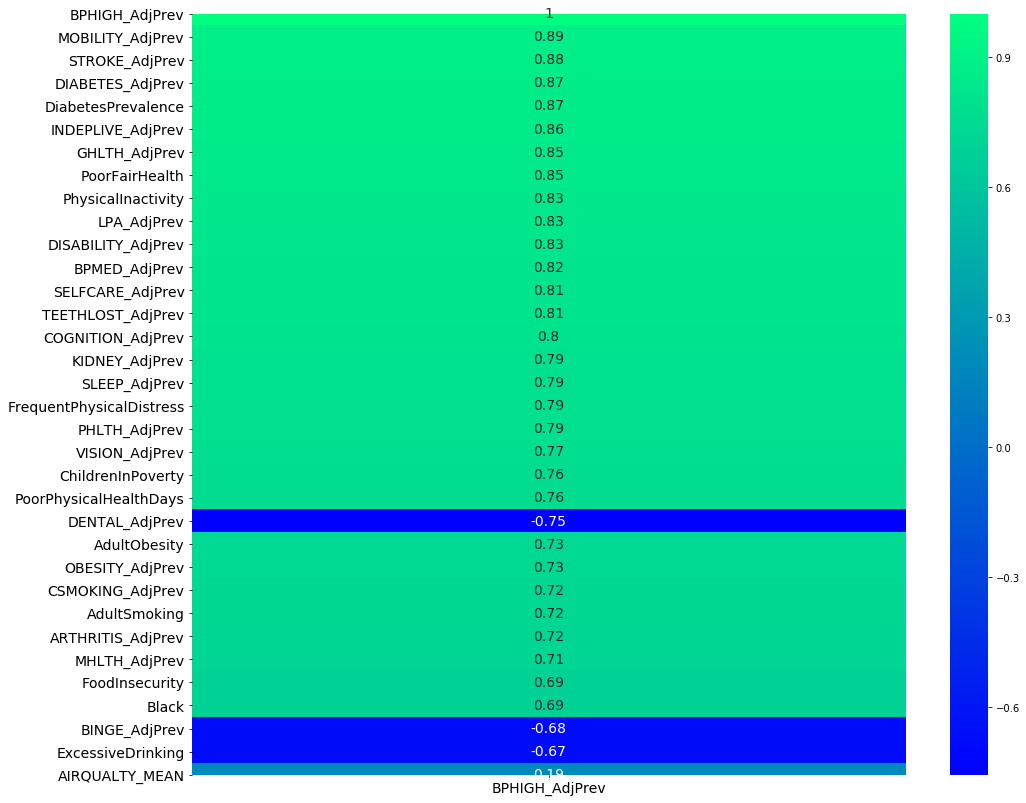

In [12]:
# correlation comparrison select complete - ccsc

ccsc = cc.loc[list(dfsc.columns),['BPHIGH_AdjPrev']]

plt.figure(figsize=(16,14))
sns.heatmap(data = ccsc, annot = True, annot_kws={"size":14},cmap="winter")
ax = plt.xticks(fontsize =14)
plt.yticks(fontsize =14, rotation=0)
plt.show()

## Checking for linear relationship
We are going to use seaborn and the `pairplot` method to see scatter plots of our dependent variable `target` against the independent variables.  We will look for linear relationships.


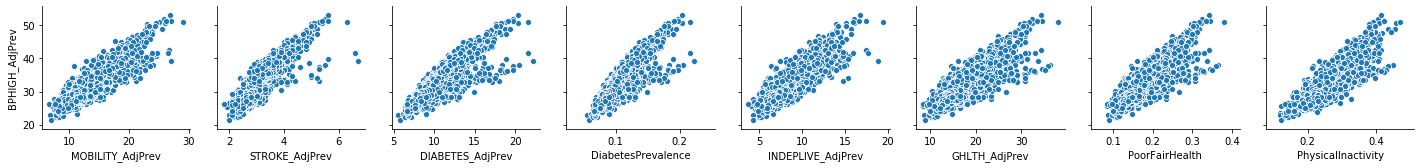

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=dfsc,
                  y_vars=['BPHIGH_AdjPrev'],
                  x_vars=['MOBILITY_AdjPrev', 'STROKE_AdjPrev','DIABETES_AdjPrev', 'DiabetesPrevalence', 
                          'INDEPLIVE_AdjPrev','GHLTH_AdjPrev','PoorFairHealth','PhysicalInactivity'])
plt.show()

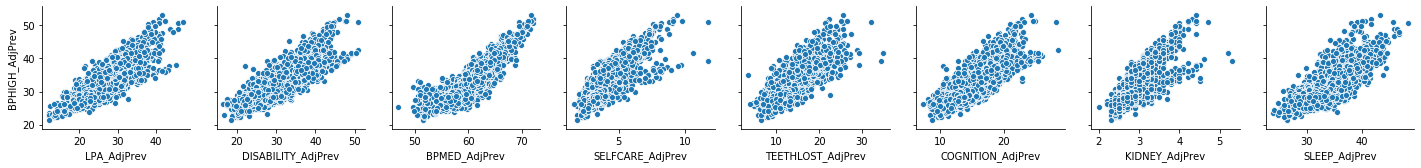

In [15]:
sns.pairplot(data=dfsc,
                  y_vars=['BPHIGH_AdjPrev'],
                  x_vars=['LPA_AdjPrev','DISABILITY_AdjPrev', 'BPMED_AdjPrev','SELFCARE_AdjPrev',
                          'TEETHLOST_AdjPrev','COGNITION_AdjPrev','KIDNEY_AdjPrev', 'SLEEP_AdjPrev'])
plt.show()

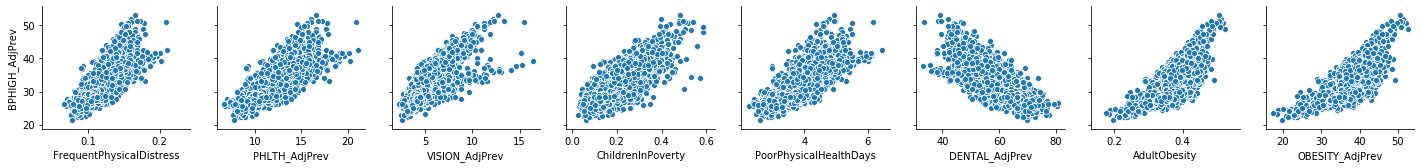

In [16]:
sns.pairplot(data=dfsc,
                  y_vars=['BPHIGH_AdjPrev'],
                  x_vars=['FrequentPhysicalDistress', 'PHLTH_AdjPrev','VISION_AdjPrev','ChildrenInPoverty',
                          'PoorPhysicalHealthDays','DENTAL_AdjPrev', 'AdultObesity','OBESITY_AdjPrev'])
plt.show()

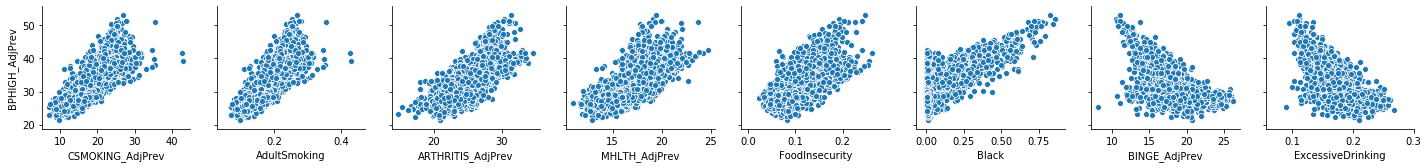

In [17]:
sns.pairplot(data=dfsc,
                  y_vars=['BPHIGH_AdjPrev'],
                  x_vars=['CSMOKING_AdjPrev','AdultSmoking', 'ARTHRITIS_AdjPrev', 'MHLTH_AdjPrev', 
                          'FoodInsecurity', 'Black', 'BINGE_AdjPrev', 'ExcessiveDrinking'])
plt.show()

In [19]:
dfsc.columns

Index(['BPHIGH_AdjPrev', 'MOBILITY_AdjPrev', 'STROKE_AdjPrev',
       'DIABETES_AdjPrev', 'DiabetesPrevalence', 'INDEPLIVE_AdjPrev',
       'GHLTH_AdjPrev', 'PoorFairHealth', 'PhysicalInactivity', 'LPA_AdjPrev',
       'DISABILITY_AdjPrev', 'BPMED_AdjPrev', 'SELFCARE_AdjPrev',
       'TEETHLOST_AdjPrev', 'COGNITION_AdjPrev', 'KIDNEY_AdjPrev',
       'SLEEP_AdjPrev', 'FrequentPhysicalDistress', 'PHLTH_AdjPrev',
       'VISION_AdjPrev', 'ChildrenInPoverty', 'PoorPhysicalHealthDays',
       'DENTAL_AdjPrev', 'AdultObesity', 'OBESITY_AdjPrev', 'CSMOKING_AdjPrev',
       'AdultSmoking', 'ARTHRITIS_AdjPrev', 'MHLTH_AdjPrev', 'FoodInsecurity',
       'Black', 'BINGE_AdjPrev', 'ExcessiveDrinking', 'AIRQUALTY_MEAN'],
      dtype='object')